# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer Integrante:
Alejandro Castaño Rojas
#### Segundo Integrante:
Angélica Arroyave Mendoza

In [1]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [10]:
#cargamos la bd de entrenamiento
db = np.loadtxt('BDatos/AirQualityM.data',delimiter='\t')  # Assuming tab-delimiter
print("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print("Hay valores perdidos")
else:
    print("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [13]:
X = DataBase[:,0:12]

Y = DataBase[:,12]

Definimos la función

In [14]:
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 

Complete el código siguiente para usar la regresión por vectores de suporte usando la librería sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [45]:

from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}

def process_values(kernel, gamma, c):
    if gamma == 0:
        gamma = 'auto'
    #Implemetamos la metodología de validación cross validation con 10 folds
    Folds = 5
    Errores = np.ones(Folds)
    j = 0
    kf = KFold(n_splits=Folds)
    vectorSupport = np.ones(Folds)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]      

        #Normalizamos los datos
        scaler = preprocessing.StandardScaler().fit(X_train)
        Xtrain = scaler.transform(X_train)
        Xtest = scaler.transform(X_test)

        #Complete el código
        modelo = SVR(kernel=kernel,C=c,gamma=gamma)


        # Entrenar el modelo
        modelo.fit(Xtrain,y_train)
        vectors = np.size(modelo.support_vectors_,0)
        vectorSupport[j] = vectors/len(X_train)
        # Validación del modelo
        ypred = modelo.predict(Xtest)
        Errores[j] = MAPE(ypred, y_test)
        j+=1
    errores = np.mean(Errores)
    standard = np.std(Errores)
    vectores = np.mean(vectorSupport)
    print("\nError de validación: " + str(errores) + " +/- " + str(standard))
    print(" Porcentaje de Vectores de Soporte: " + str(vectores))
    print (("\n\nTiempo total de ejecución: " + str(time.time()-tiempo_i)) + " segundos.")
    return errores, standard, vectores, X_test, y_test, ypred

## Ejercicio 2

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [28]:
import pandas as pd
import qgrid
kernel_s = ['linear','linear','linear','linear','linear','linear','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']
c_s = [0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]
gamma_s = [0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1]
df_types = pd.DataFrame({
    'Kernel' : pd.Series(kernel_s),
    'C' : pd.Series(c_s),
    'gamma' : pd.Series(gamma_s)})
df_types["MAPE Promedio"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["MAPE Promedio"][23] = "0.2259"
df_types["Intervalo de confianza"][23] = "0.1109"
df_types["% de Vectores de Soporte"][23] = "0.2191"
#df_types.sort_index(inplace=True)
i = 0
for kernel, gamma, c in zip(kernel_s, gamma_s, c_s):
    error, std, p_vectores, x_test, y_test, y_pred = process_values(kernel, gamma, c)
    df_types["MAPE Promedio"][i] = str(error)
    df_types["Intervalo de confianza"][i] = str(std)
    df_types["% de Vectores de Soporte"][i] = str(p_vectores)
    i += 1
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget


Error de validación: 0.21532161504323985 +/- 0.06460100562932213
 Porcentaje de Vectores de Soporte: 0.3786300277723352


Tiempo total de ejecución: 7.332542896270752 segundos.

Error de validación: 0.24490897173183038 +/- 0.0962859267563447
 Porcentaje de Vectores de Soporte: 0.37665612594249104


Tiempo total de ejecución: 11.118451356887817 segundos.

Error de validación: 0.27680077418621385 +/- 0.13461740462666608
 Porcentaje de Vectores de Soporte: 0.384970000032475


Tiempo total de ejecución: 19.197284936904907 segundos.

Error de validación: 0.2869582909645992 +/- 0.15071982828475336
 Porcentaje de Vectores de Soporte: 0.38622128608226974


Tiempo total de ejecución: 53.339921712875366 segundos.

Error de validación: 0.2866052170692736 +/- 0.1500497705716069
 Porcentaje de Vectores de Soporte: 0.38633249759104876


Tiempo total de ejecución: 309.79791927337646 segundos.

Error de validación: 0.28853639336068776 +/- 0.1531772568363643
 Porcentaje de Vectores de Soporte: 0.38630

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [29]:
qgrid_widget.get_changed_df()

MAPE Promedio Intervalo de confianza  \
Kernel C       gamma                                               
linear 0.001   0.00   0.21532161504323985    0.06460100562932213   
       0.010   0.00   0.24490897173183038     0.0962859267563447   
       0.100   0.00   0.27680077418621385    0.13461740462666608   
       1.000   0.00    0.2869582909645992    0.15071982828475336   
       10.000  0.00    0.2866052170692736     0.1500497705716069   
       100.000 0.00   0.28853639336068776     0.1531772568363643   
rbf    0.001   0.01   0.40149213855950106    0.20620107233468235   
               0.10    0.3285171161868212    0.14022405087833348   
               1.00    0.4905252936086666    0.28594350839964744   
       0.010   0.01    0.1830244451805043     0.0380779512969904   
               0.10    0.1792828703516775    0.05056250778672696   
               1.00    0.3905585218583519    0.23416305674543042   
       0.100   0.01    0.1474991396673567    0.03821109122787159   
               0.10    0.1499473954045052   0.054459046130068585   
               1.00   0.26858280368586335     0.1504053866869833   
       1.000   0.01   0.20443133125267948    0.18742060480901734   
               0.10   0.19166755765933371    0.14041298551363568   
               1.00   0.23787662010514787    0.12997619659073503   
       10.000  0.01     0.559006192875873     0.9123220758887022   
               0.10   0.18029619223187462     0.1709242151764691   
               1.00   0.22261295327352126     0.1082996443994473   
       100.000 0.01    0.6903611071317125      1.209663351940297   
               0.10   0.21414626314238022      0.203580915963876   
               1.00    0.2259390395748797    0.11094914643434282   

                     % de Vectores de Soporte  
Kernel C       gamma                           
linear 0.001   0.00        0.3786300277723352  
       0.010   0.00       0.37665612594249104  
       0.100   0.00         0.384970000032475  
       1.000   0.00       0.38622128608226974  
       10.000  0.00       0.38633249759104876  
       100.000 0.00        0.3863047005129662  
rbf    0.001   0.01        0.7470254652163836  
               0.10         0.642560272493326  
               1.00         0.769381251732968  
       0.010   0.01        0.4433882697412993  
               0.10        0.2780009478069072  
               1.00        0.5615628615263233  
       0.100   0.01       0.19049660040575228  
               0.10        0.1517632587423164  
               1.00       0.26901942192284023  
       1.000   0.01       0.12203941014832273  
               0.10       0.16574939530723465  
               1.00       0.21668909892156618  
       10.000  0.01       0.16377644839787536  
               0.10       0.10440963336156599  
               1.00        0.2132966955730505  
       100.000 0.01       0.10210253387184147  
               0.10       0.10460419744384411  
               1.00       0.21910801302774435

#### 3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?
#### R/: 
Las funciones kernel que hace que las SMV sean aplicables para cualquier conjunto de datos.
#### 3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.
#### R/: 
En general, cuanto menor sea el número de vectores de soporte, es más probable obtener un clasificador con mayor capacidad de generalización. Además, entre menor sea el número de vectores de soporte, menor es el costo computacional de verificar si una muestra pertenece a un conjunto u otro. 


#### 3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

In [33]:
'''Complete el código para hacer la gráfica aquí'''

'Complete el código para hacer la gráfica aquí'

In [72]:
error, std, p_vectores, x_test, y_test, y_pred = process_values(kernel='rbf', gamma=0.01, c=0.1)
print('Terminado de correr en el kernel RBF, gamma 0.01 y C 0.1; El cual fue el que arrojó el menor MAPE')


Error de validación: 0.1474991396673567 +/- 0.03821109122787159
 Porcentaje de Vectores de Soporte: 0.19049660040575228


Tiempo total de ejecución: 1064.6287276744843 segundos.
Terminado de correr en el kernel RBF, gamma 0.01 y C 0.1; El cual fue el que arrojó el menor MAPE


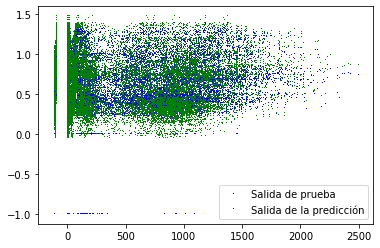

In [73]:
plt.plot(x_test, y_test, 'b,')
plt.plot(x_test, y_pred, 'g,')
plt.legend(['Salida de prueba', 'Salida de la predicción'])
plt.show()